# Importing Necessary Packages

In [2]:
#pip install factor-analyzer

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [4]:
cc_data=pd.read_csv('../input/CC_GENERAL.csv')

In [5]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
# converting column names from uppercase to title foramt for ease of analysis
cc_data.columns=[i.title() for i in cc_data.columns.to_list()]
cc_data.columns

Index(['Cust_Id', 'Balance', 'Balance_Frequency', 'Purchases',
       'Oneoff_Purchases', 'Installments_Purchases', 'Cash_Advance',
       'Purchases_Frequency', 'Oneoff_Purchases_Frequency',
       'Purchases_Installments_Frequency', 'Cash_Advance_Frequency',
       'Cash_Advance_Trx', 'Purchases_Trx', 'Credit_Limit', 'Payments',
       'Minimum_Payments', 'Prc_Full_Payment', 'Tenure'],
      dtype='object')

In [7]:
# removing customer ID column
cc_data.drop(columns=['Cust_Id'],inplace=True)

# Data Wrangling

In [8]:
# UDF for descriptive stats of features
def con_stats(c):
    return pd.Series({'Count': c.count(),'NaN':c.isnull().sum(),'Uniques':len(c.unique()),'Sum':c.sum(),'Mean':c.mean(),'Coef.Var.':(c.std()/c.mean()),
                      'Min':c.min(),'P1':c.quantile(.01),'P5':c.quantile(.05),'P10':c.quantile(.1),'P25':c.quantile(.25),'P50':c.quantile(.5),'P75':c.quantile(.75),'P90':c.quantile(.9),
                      'P95':c.quantile(.95),'P99':c.quantile(.99),'Max':c.max()})

In [9]:
# UDF for missing val. treatment
def mis(c):
    c.fillna(c.mean(),inplace=True)
    return c

In [10]:
# UDF for outlier treatment
def outs(c):
    c.clip(lower=c.quantile(.05), upper=c.quantile(.95),inplace=True)
    return c

In [11]:
cc_data.select_dtypes(exclude='object').apply(con_stats).T.round(2)

,Count,NaN,Uniques,Sum,Mean,Coef.Var.,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
Balance,8950.0,0.0,8871.0,14002049.71,1564.47,1.33,0.00,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9338.80,19043.14
Balance_Frequency,8950.0,0.0,43.0,7851.57,0.88,0.27,0.00,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
Purchases,8950.0,0.0,6203.0,8978683.26,1003.20,2.13,0.00,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8977.29,49039.57
Oneoff_Purchases,8950.0,0.0,4014.0,5302314.47,592.44,2.80,0.00,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2671.09,6689.90,40761.25
Installments_Purchases,8950.0,0.0,4452.0,3679055.42,411.07,2.20,0.00,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3886.24,22500.00
Cash_Advance,8950.0,0.0,4323.0,8760896.46,978.87,2.14,0.00,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9588.16,47137.21
Purchases_Frequency,8950.0,0.0,47.0,4388.64,0.49,0.82,0.00,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
Oneoff_Purchases_Frequency,8950.0,0.0,47.0,1812.00,0.20,1.47,0.00,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
Purchases_Installments_Frequency,8950.0,0.0,47.0,3261.71,0.36,1.09,0.00,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
Cash_Advance_Frequency,8950.0,0.0,54.0,1209.54,0.14,1.48,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,1.50


Observations :
* All features satisfy coef. of variance of more than 0.1
* Only 2 features have NaNs
* More outliers present at the upper side compared to lower side

In [12]:
cc_data.isnull().any().any()

True

In [13]:
cc_data=cc_data.apply(mis)

In [14]:
cc_data.isnull().any().any()

False

#### Tenure feature
* Having an "older" credit age is better for your credit score because it shows that you have a lot of experience handling credit.
* Hence we don't want to change tenure as it is discrete numerical, and has no significant outliers.

In [15]:
tenure_series=cc_data.Tenure
cc_data.drop(columns=['Tenure'],inplace=True)
cc_data=cc_data.apply(outs)

In [16]:
cc_data=pd.concat([cc_data,tenure_series],axis=1)
cc_data.select_dtypes(exclude='object').apply(con_stats).T.round(2)

,Count,NaN,Uniques,Sum,Mean,Coef.Var.,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
Balance,8950.0,0.0,8056.0,12998976.36,1452.40,1.16,8.81,8.81,8.82,23.58,128.28,873.39,2054.14,4338.56,5907.79,5909.11,5909.11
Balance_Frequency,8950.0,0.0,32.0,7905.11,0.88,0.25,0.27,0.27,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
Purchases,8950.0,0.0,5756.0,7373574.05,823.86,1.33,0.00,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3997.90,3998.62,3998.62
Oneoff_Purchases,8950.0,0.0,3567.0,4009141.13,447.95,1.67,0.00,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2668.95,2671.09,2671.09
Installments_Purchases,8950.0,0.0,4011.0,3010207.56,336.34,1.48,0.00,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1748.44,1750.09,1750.09
Cash_Advance,8950.0,0.0,3876.0,7313592.25,817.16,1.65,0.00,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4643.58,4647.17,4647.17
Purchases_Frequency,8950.0,0.0,47.0,4388.64,0.49,0.82,0.00,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
Oneoff_Purchases_Frequency,8950.0,0.0,47.0,1812.00,0.20,1.47,0.00,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
Purchases_Installments_Frequency,8950.0,0.0,47.0,3261.71,0.36,1.09,0.00,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
Cash_Advance_Frequency,8950.0,0.0,28.0,1142.35,0.13,1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.58,0.58


# Feature Engineering

Factors affecting Credit Card score of a customer :
* Payment History 
* Credit Utilisation
* Duration of credit history

In [17]:
# deriving monthly avg purchase - Avg_Monthly_Pur from Purchases
cc_data['Avg_Mon_Pur'] = cc_data.Purchases/cc_data.Tenure

In [18]:
# deriving monthly avergae Cash advance - Avg_Mon_Cash from Cash_Advance
cc_data['Avg_Mon_Cash'] = cc_data.Cash_Advance/cc_data.Tenure

In [19]:
# creating credit utilization from balance and credit limit (affects upto 30% of credit score)

'''A low credit utilization rate shows you're using less of your available credit. 
Credit scoring models generally interpret this as an indication you're doing a good job managing credit by not overspending,
and keeping your spending in check, this helps maintain good credit score'''

cc_data['Credit_Uti'] = cc_data.Balance/cc_data.Credit_Limit #30% or less is good

In [20]:
# deriving payments to min.payments ratio
cc_data['Pay_to_Minpay']=cc_data['Payments']/cc_data['Minimum_Payments']

In [21]:
# creating credit type flag to check if customer has only oneoff or only installment or both

conditions = [((cc_data.Oneoff_Purchases==0)&(cc_data.Installments_Purchases==0)),((cc_data.Oneoff_Purchases>0)&(cc_data.Installments_Purchases==0)),
             ((cc_data.Oneoff_Purchases==0)&(cc_data.Installments_Purchases>0)),((cc_data.Oneoff_Purchases>0)&(cc_data.Installments_Purchases>0))]
choices = ['None','Oneoff','Installment','Both']

# using np.select for checking multiple conditions
cc_data['Credit_Type']=np.select(conditions, choices)

In [22]:
cc_data.head()

,Balance,Balance_Frequency,Purchases,Oneoff_Purchases,Installments_Purchases,Cash_Advance,Purchases_Frequency,Oneoff_Purchases_Frequency,Purchases_Installments_Frequency,Cash_Advance_Frequency,...,Credit_Limit,Payments,Minimum_Payments,Prc_Full_Payment,Tenure,Avg_Mon_Pur,Avg_Mon_Cash,Credit_Uti,Pay_to_Minpay,Credit_Type
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,Installment
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,387.264093,0.457495,3.826241,None
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,Oneoff
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,89.988924,864.206542,0.000000,12,124.916667,17.149001,0.222223,0.104129,Oneoff
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,Oneoff


# Exploratory Data Analysis

Text(0.5, 1.0, 'Tenure of Customer')

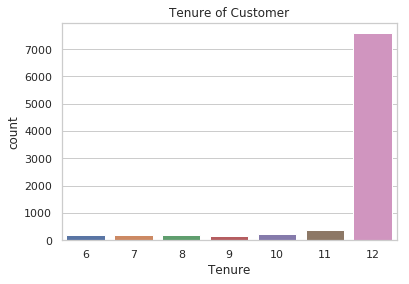

In [23]:
sns.set(style='whitegrid')
sns.countplot(cc_data.Tenure)
plt.title('Tenure of Customer')

* Majority of the credit company's customers are have tenure of 12, indicating the majority have good experience in handling credit.

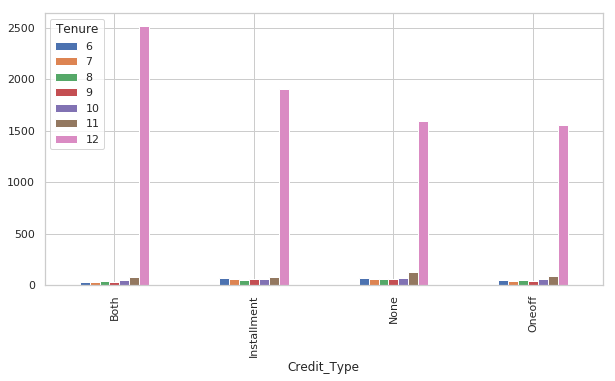

In [24]:
df_ct=cc_data.groupby('Tenure').Credit_Type.value_counts()
df_ct.unstack(level=0).plot(kind='bar',figsize=(10,5))

* Across different credit types, most customers have high tenure of 12.

Text(0.5, 0, 'Tenure')

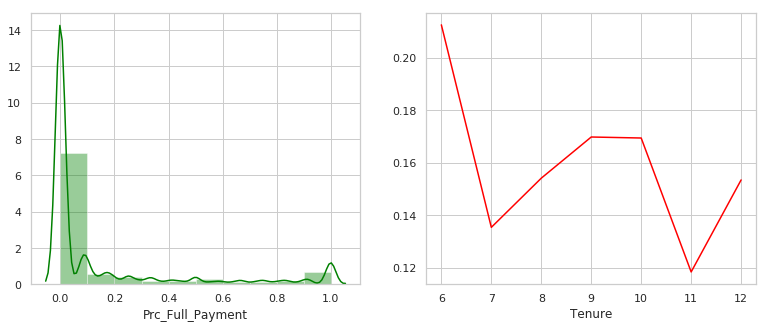

In [25]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
sns.distplot(cc_data.Prc_Full_Payment, ax=ax1, bins=10, color='green')
sns.lineplot(data=cc_data.groupby('Tenure').Prc_Full_Payment.mean(), ax=ax2, color='red')
ax2.set_xlabel('Tenure')

* The first histogram plot shows that very few customers pay full balance every month (shown by little peak at PRC=1), on the  contrary most customers fail to pay full balance most of the months (max peak at 0<=PRC<=0.1)
* Second lineplot explains Tenure of customers with their Mean PRC, customers with Tenure=6 are more likely to pay full balances every month as opposed to those with tenure=11.

Text(0, 0.5, 'Mean Cash Advance')

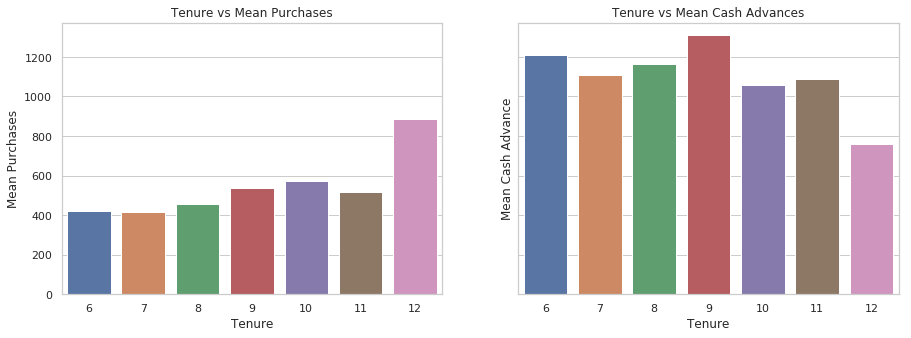

In [26]:
df1=cc_data.groupby('Tenure').agg({'Purchases':'mean','Cash_Advance':'mean'})
f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.barplot(x=df1.index, y=df1.Purchases, ax=ax1)
ax1.set_title('Tenure vs Mean Purchases')
ax1.set_ylabel('Mean Purchases')
sns.barplot(x=df1.index, y=df1.Cash_Advance,ax=ax2)
ax2.set_title('Tenure vs Mean Cash Advances')
ax2.set_ylabel('Mean Cash Advance')

* Tenure seems to affect the spend on purchases, as purchases tend to increase with tenure (with an exception of tenure=11). Customers with tenure=12 have max spend on purchases followed by tenure=10
* However, tenure has no effect on cash advances of customers.
* **In general, value of cash advances are higher compared to purchases across all tenure.**

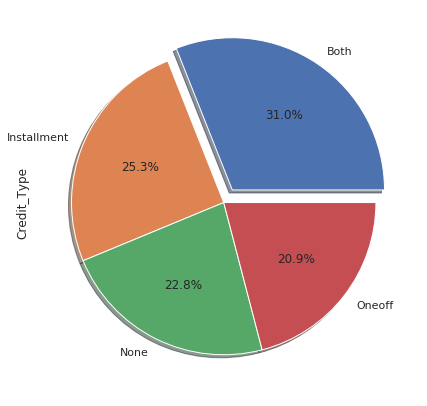

In [27]:
#cc_data.Credit_Type.value_counts()
plt.figure(figsize=(14,7))
ex= (0.1,0,0,0)
cc_data.Credit_Type.value_counts().plot(kind='pie', explode=ex, autopct='%1.1f%%', shadow=True)

* Most of the customers are "Both" type i.e. have mixed type of credit i.e. have both oneoff purchase and installment purchase. Having mixed type is favourable for a good credit score.
* The next major type is "Installment", i.e. these are those customers that use card for installment purchases.

Avg. Credit Utilisation : 37.50036132148551


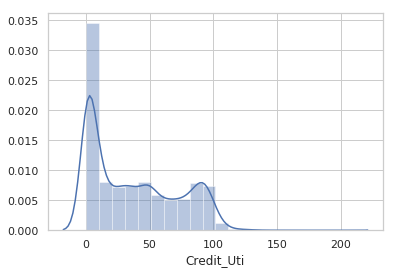

In [28]:
sns.distplot((cc_data.Credit_Uti*100), bins=20)
print('Avg. Credit Utilisation :', cc_data.Credit_Uti.mean()*100)

* While good proportion of customers have low credit utilisation, which shows controlled behaviour in credit card usage,
* The avg. Credit utilisation is ~37%, which is more than the preferred 30%,
* Also, some customers have Utilisation of more than 100%, indicating high spending, risky customers.

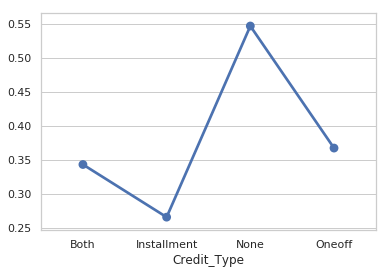

In [29]:
sns.pointplot(x=cc_data.groupby('Credit_Type').Credit_Uti.mean().index, y=cc_data.groupby('Credit_Type').Credit_Uti.mean().values)

* from the pointplot it is clear that, customers with "Installment" type credit have the lowest credit utilisation followed by those with "Both", this shows they have control over their credit card usage.
* Users with neither oneoff nor installment have the highest credit card utilisation, these are cash advance users whos usage is high (beyond limit too).

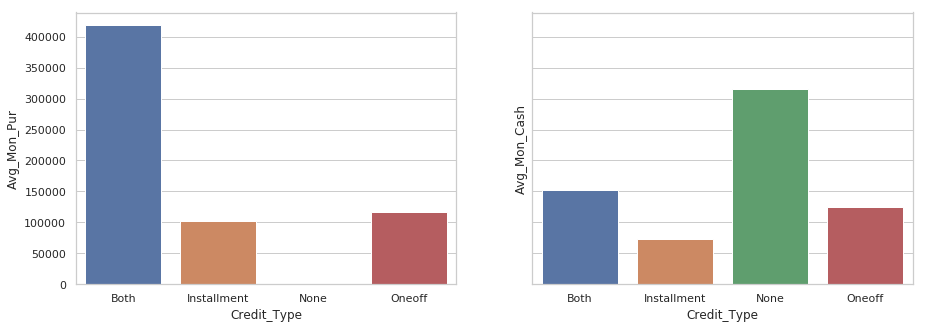

In [30]:
df_agg=cc_data.groupby('Credit_Type').agg({'Avg_Mon_Pur':'sum','Avg_Mon_Cash':'sum'})
f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.barplot(x=df_agg.index,y='Avg_Mon_Pur',data=df_agg,ax=ax1)
sns.barplot(x=df_agg.index,y='Avg_Mon_Cash',data=df_agg,ax=ax2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff29b4add8>,
      dtype=object)

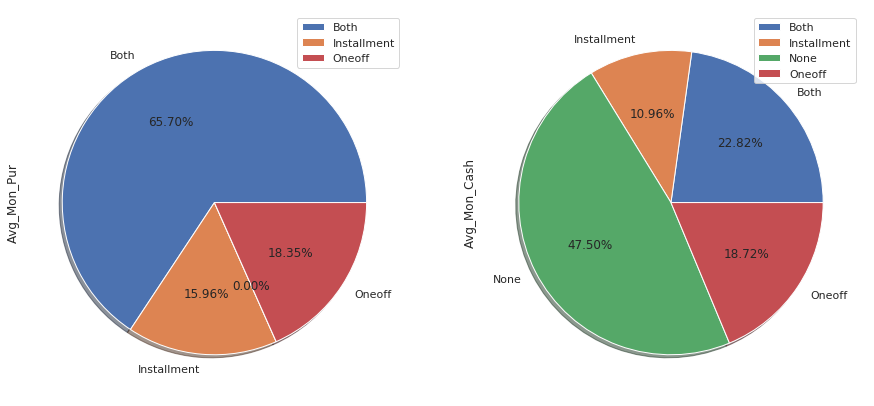

In [31]:
df_agg.plot(kind='pie', subplots=True,figsize=(15,7),autopct='%.2f%%',shadow=True)

* from the first plot it is clear that "both" type have the highest avg. monthly purchase among all types.
* None type have the highest cash advances.
* However the sum total of purchases & cash advances done by "both" type towers those of other types, hence we can say **"Both" type are very active users of credit card.**

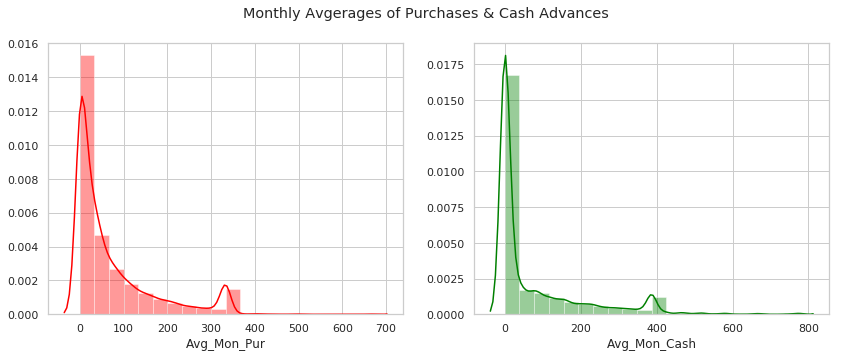

In [32]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5))
f.suptitle('Monthly Avgerages of Purchases & Cash Advances')
sns.distplot(cc_data.Avg_Mon_Pur,color='red',bins=20,ax=ax1)
sns.distplot(cc_data.Avg_Mon_Cash,color='green',bins=20,ax=ax2)

* On an avergae, customers spend around 70-80 on purchases in a month.
* Similarly, the average monthly cash advances range 70-80.
* However, there are few exceptions too, where both monthly purchase and cash advances have exceeded 700.

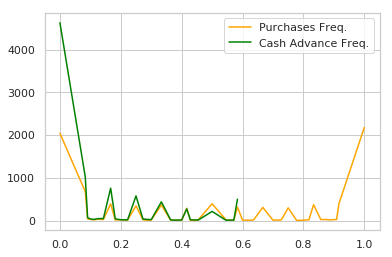

In [33]:
sns.lineplot(data=cc_data.Purchases_Frequency.value_counts(),label='Purchases Freq.',color='orange')
sns.lineplot(data=cc_data.Cash_Advance_Frequency.value_counts(),label='Cash Advance Freq.', color='green')

* Among customers doing Puchase transactions, majority of them have done atleast 1 purchase transaction every month.
* Whereas, among those with Cash Advances, majority have not withdrawn any cash in 12 straight months.

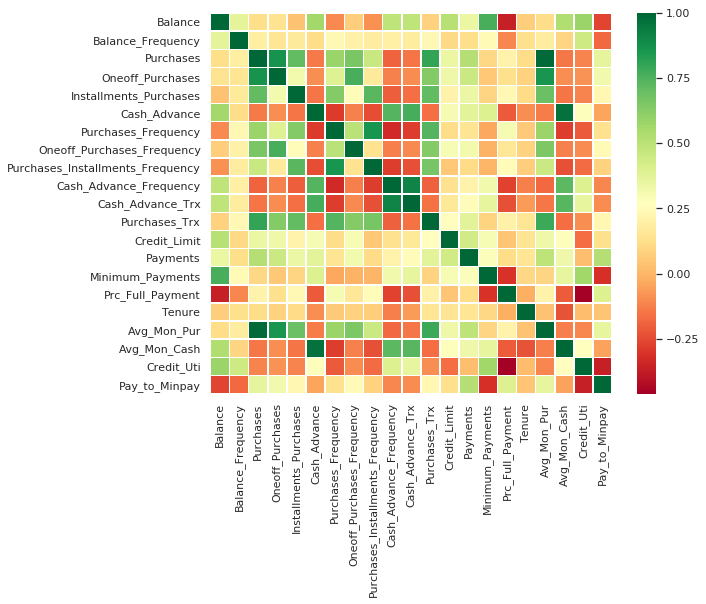

In [34]:
# Multi-Collinearity check
cormat=cc_data.corr()
plt.figure(figsize=(9,7))
sns.heatmap(cormat,linewidths=.5, cmap='RdYlGn')

In [35]:
# Label Encoding credit type column
lel=LabelEncoder()
cc_data.Credit_Type=lel.fit_transform(cc_data.Credit_Type)

In [36]:
lel.classes_

array(['Both', 'Installment', 'None', 'Oneoff'], dtype=object)

In [37]:
# Scaling the data
sc=StandardScaler()
scaled_data=sc.fit_transform(cc_data)
scaled_data=pd.DataFrame(scaled_data,columns=cc_data.columns)

In [38]:
scaled_data.head(3)

,Balance,Balance_Frequency,Purchases,Oneoff_Purchases,Installments_Purchases,Cash_Advance,Purchases_Frequency,Oneoff_Purchases_Frequency,Purchases_Installments_Frequency,Cash_Advance_Frequency,...,Credit_Limit,Payments,Minimum_Payments,Prc_Full_Payment,Tenure,Avg_Mon_Pur,Avg_Mon_Cash,Credit_Uti,Pay_to_Minpay,Credit_Type
0,-0.835783,-0.297904,-0.662389,-0.600394,-0.483999,-0.605707,-0.806490,-0.678661,-0.707313,-0.722502,...,-1.049831,-0.800356,-0.718147,-0.525551,0.36068,-0.669122,-0.586149,-0.974347,-0.466950,-0.299960
1,1.036257,0.118296,-0.749136,-0.600394,-0.675642,2.838929,-1.221758,-0.678661,-0.916995,0.692644,...,0.821154,1.643245,0.597061,0.234227,0.36068,-0.753355,2.465902,0.240571,-0.118115,0.590174
2,0.617437,0.534496,-0.046095,0.435900,-0.675642,-0.605707,1.269843,2.673451,-0.916995,-0.722502,...,0.977070,-0.537116,-0.030428,-0.525551,0.36068,-0.070682,-0.586149,-0.123410,-0.533621,1.480309


# Feature Selection

In [39]:
scaled_data.shape

(8950, 22)

In [40]:
# performing PCA
pc=PCA(n_components=22)
pc.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=22, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [41]:
# to find optimum eigen value and variance capture
eigen=pd.DataFrame({'Eigen Values':pc.explained_variance_.round(2), 'Cumulative Var. Explained':(np.cumsum(pc.explained_variance_ratio_)*100).round(2)})
eigen  #n_components=5 chosen 

,Eigen Values,Cumulative Var. Explained
0,6.70,30.46
1,4.85,52.49
2,2.21,62.53
3,1.67,70.12
4,1.17,75.44
5,0.96,79.81
6,0.83,83.59
7,0.71,86.80
8,0.55,89.27
9,0.46,91.39


In [42]:
pc2=PCA(n_components=5)
pca_data=pc2.fit_transform(scaled_data)
pca_data

array([[-1.30495195, -2.46600114, -0.22372396,  0.19708809, -0.2517068 ],
       [-2.78767973,  2.89836732,  1.58346665, -0.72414474, -1.27534824],
       [ 0.63851293, -0.14667522, -0.15038536,  2.68668525,  0.30481846],
       ...,
       [-0.37882403, -2.66495422, -0.31907404, -1.83406982,  2.77650183],
       [-2.26020649, -2.29954882,  0.89745361, -0.6796214 ,  2.90743751],
       [ 0.0057243 , -0.70272452,  1.14171492,  0.9513235 ,  4.64890951]])

In [43]:
red_dim=pd.DataFrame(pca_data, columns=['PC1','PC2','PC3','PC4','PC5'])
red_dim

,PC1,PC2,PC3,PC4,PC5
0,-1.304952,-2.466001,-0.223724,0.197088,-0.251707
1,-2.787680,2.898367,1.583467,-0.724145,-1.275348
2,0.638513,-0.146675,-0.150385,2.686685,0.304818
3,-0.650295,-0.440924,0.810995,2.307828,-0.483295
4,-2.029563,-1.624076,-0.558811,1.561905,0.112213
...,...,...,...,...,...
8945,0.374332,-2.525193,-0.286364,-2.281795,2.820966
8946,-0.008466,-1.959955,-1.269814,-1.718488,2.726355
8947,-0.378824,-2.664954,-0.319074,-1.834070,2.776502
8948,-2.260206,-2.299549,0.897454,-0.679621,2.907438


In [44]:
# to get factor loadings of the features on components-
Loadings =  pd.DataFrame((pc2.components_.T * np.sqrt(pc2.explained_variance_)).T,columns=scaled_data.columns).T
Loadings

,0,1,2,3,4
Balance,-0.126071,0.840398,-0.240777,0.166358,-0.183583
Balance_Frequency,0.147583,0.415510,-0.457984,0.109164,0.167679
Purchases,0.883129,0.307593,0.100156,0.176065,0.096017
Oneoff_Purchases,0.707778,0.307821,0.247860,0.444062,0.219170
Installments_Purchases,0.762044,0.162459,-0.190425,-0.320571,-0.108939
Cash_Advance,-0.390391,0.767770,0.249226,-0.295852,-0.003571
Purchases_Frequency,0.811868,-0.010963,-0.277962,-0.269530,0.101678
Oneoff_Purchases_Frequency,0.647760,0.224306,0.174815,0.404673,0.275487
Purchases_Installments_Frequency,0.700671,-0.030117,-0.398933,-0.518411,-0.051273
Cash_Advance_Frequency,-0.451813,0.699715,0.126238,-0.229381,0.205490


## FACTOR ANALYSIS

In [45]:
#scaled_data

In [46]:
#corr = scaled_data.corr()
#corr

In [47]:
#eigen_values = np.linalg.eigvals(corr)
#eigen_values_cumvar = (eigen_values/corr.shape[0]).cumsum()
#pd.DataFrame({'Eigen_value': eigen_values, 'Cumm_variance':eigen_values_cumvar}, index=range(1,23))

In [48]:
#fa = FactorAnalyzer(n_factors=6,rotation='varimax',method='principal').fit(corr)

In [49]:
#loadings=pd.DataFrame(fa.loadings_,columns=["Fctr1","Fctr2","Fctr3","Fctr4","Fctr5","Fctr6"])
#loadings

In [50]:
#loadings.to_excel('FactorAnalysis_loadings.xls')

In [51]:
#fa.get_factor_variance()

* Selecting the following features based on loadings from PCA and business importance.
* 'Pay_to_Minpay', 'Credit_Uti', 'Avg_Mon_Pur', 'Avg_Mon_Cash', 'Tenure','Purchases_Frequency','Cash_Advance_Frequency'

In [52]:
#final_fet=['Installments_Purchases', 'Credit_Type', 'Pay_to_Minpay', 'Credit_Uti', 'Avg_Mon_Pur', 'Avg_Mon_Cash', 'Tenure'] # this from FA

final_fet=['Pay_to_Minpay', 'Credit_Uti', 'Avg_Mon_Pur', 'Avg_Mon_Cash', 'Tenure','Purchases_Frequency','Cash_Advance_Frequency'] # this from PCA

final_data=scaled_data[final_fet]
final_data.head()

,Pay_to_Minpay,Credit_Uti,Avg_Mon_Pur,Avg_Mon_Cash,Tenure,Purchases_Frequency,Cash_Advance_Frequency
0,-0.466950,-0.974347,-0.669122,-0.586149,0.36068,-0.806490,-0.722502
1,-0.118115,0.240571,-0.753355,2.465902,0.36068,-1.221758,0.692644
2,-0.533621,-0.123410,-0.070682,-0.586149,0.36068,1.269843,-0.722502
3,-0.663724,-0.445556,0.570192,-0.450997,0.36068,-1.014125,-0.250789
4,-0.272787,0.893629,-0.739228,-0.586149,0.36068,-1.014125,-0.722502


## Clustering & Segmentation

In [53]:
# segmenting based on a range of different cluster sizes

rs = 12345
k3 = KMeans(n_clusters=3, random_state=rs).fit(final_data)
k4 = KMeans(n_clusters=4, random_state=rs).fit(final_data)
k5 = KMeans(n_clusters=5, random_state=rs).fit(final_data)
k6 = KMeans(n_clusters=6, random_state=rs).fit(final_data)
k7 = KMeans(n_clusters=7, random_state=rs).fit(final_data)
k8 = KMeans(n_clusters=8, random_state=rs).fit(final_data)

In [54]:
print(k3.labels_.shape)
print(k7.labels_.shape)

(8950,)
(8950,)


In [55]:
# adding the labels to our original data
cc_data['K3']=k3.labels_
cc_data['K4']=k4.labels_
cc_data['K5']=k5.labels_
cc_data['K6']=k6.labels_
cc_data['K7']=k7.labels_
cc_data['K8']=k8.labels_

In [56]:
cc_data.iloc[500:510]

,Balance,Balance_Frequency,Purchases,Oneoff_Purchases,Installments_Purchases,Cash_Advance,Purchases_Frequency,Oneoff_Purchases_Frequency,Purchases_Installments_Frequency,Cash_Advance_Frequency,...,Avg_Mon_Cash,Credit_Uti,Pay_to_Minpay,Credit_Type,K3,K4,K5,K6,K7,K8
500,1199.942209,1.000000,1447.0100,306.310,1140.7000,49.912813,0.916667,0.166667,0.916667,0.083333,...,4.159401,0.499976,1.405613,0,0,0,1,0,3,1
501,5909.111808,1.000000,3998.6195,2671.094,426.3400,0.000000,0.833333,0.666667,0.416667,0.000000,...,0.000000,0.492426,2.236419,0,2,1,0,0,6,3
502,80.062693,1.000000,727.2700,727.270,0.0000,0.000000,0.583333,0.583333,0.000000,0.000000,...,0.000000,0.006672,3.982108,3,0,0,1,3,3,1
503,839.897907,1.000000,1869.8800,815.110,1054.7700,0.000000,1.000000,0.363636,0.909091,0.000000,...,0.000000,0.209974,3.563693,0,2,1,0,0,3,1
504,128.175207,0.818182,182.9400,0.000,182.9400,0.000000,0.833333,0.000000,0.833333,0.000000,...,0.000000,0.025635,7.450967,1,0,0,1,3,3,1
505,47.636800,0.727273,379.2800,0.000,379.2800,0.000000,0.583333,0.000000,0.583333,0.000000,...,0.000000,0.019055,4.098100,1,0,0,1,3,3,1
506,1529.206464,1.000000,874.9400,0.000,874.9400,0.000000,0.833333,0.000000,0.750000,0.000000,...,0.000000,1.019471,0.476622,1,0,2,4,4,4,7
507,2643.343414,1.000000,3998.6195,2671.094,1750.0875,0.000000,1.000000,1.000000,0.333333,0.000000,...,0.000000,0.220279,11.388993,0,2,1,0,0,6,3
508,2924.757622,1.000000,0.0000,0.000,0.0000,281.044645,0.000000,0.000000,0.000000,0.166667,...,23.420387,0.974919,0.570430,2,1,2,4,4,4,7
509,5036.870531,1.000000,1752.1500,1564.160,187.9900,1072.351863,1.000000,0.916667,0.583333,0.250000,...,89.362655,0.489017,0.961250,0,0,2,4,0,6,3


## Segment Evaluation

In [57]:
cc_data.K3.value_counts()*100/cc_data.shape[0]

0    51.195531
1    32.793296
2    16.011173
Name: K3, dtype: float64

In [58]:
cc_data.K4.value_counts()*100/cc_data.shape[0]

0    40.346369
2    26.100559
3    17.709497
1    15.843575
Name: K4, dtype: float64

In [59]:
cc_data.K5.value_counts()*100/cc_data.shape[0]  # this seems favourable as per dist. of data within each segment

1    37.877095
4    23.407821
2    16.826816
0    14.994413
3     6.893855
Name: K5, dtype: float64

In [60]:
cc_data.K6.value_counts()*100/cc_data.shape[0]

3    35.363128
4    22.446927
1    16.335196
0    14.324022
5     6.737430
2     4.793296
Name: K6, dtype: float64

In [61]:
cc_data.K7.value_counts()*100/cc_data.shape[0]

3    22.603352
0    20.994413
4    19.765363
2    15.553073
6     8.905028
5     6.614525
1     5.564246
Name: K7, dtype: float64

In [62]:
cc_data.K8.value_counts()*100/cc_data.shape[0]

1    22.245810
5    20.715084
7    19.240223
0    15.273743
3     8.793296
2     5.497207
6     5.184358
4     3.050279
Name: K8, dtype: float64

In [63]:
# Silhouette Scoring
s=[]
s.append(metrics.silhouette_score(final_data,k3.labels_))
s.append(metrics.silhouette_score(final_data,k4.labels_))
s.append(metrics.silhouette_score(final_data,k5.labels_))
s.append(metrics.silhouette_score(final_data,k6.labels_))
s.append(metrics.silhouette_score(final_data,k7.labels_))
s.append(metrics.silhouette_score(final_data,k8.labels_))
s

[0.2563704837778752,
 0.2559324389847792,
 0.27981448458906827,
 0.276624908544226,
 0.2728018786457987,
 0.2820860981997621]

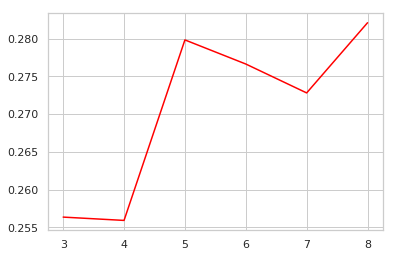

In [64]:
sns.lineplot(x=range(3,9),y=s, color='red')

* Based on the plot of Silhouette score, cluster size of 5 is best for our case.

In [65]:
# since we derived features, original not needed anymore
cc_data.drop(columns=['Purchases', 'Cash_Advance','Balance','Credit_Limit','Payments','Minimum_Payments'], inplace=True)

In [66]:
cc_data.head()

,Balance_Frequency,Oneoff_Purchases,Installments_Purchases,Purchases_Frequency,Oneoff_Purchases_Frequency,Purchases_Installments_Frequency,Cash_Advance_Frequency,Cash_Advance_Trx,Purchases_Trx,Prc_Full_Payment,...,Avg_Mon_Cash,Credit_Uti,Pay_to_Minpay,Credit_Type,K3,K4,K5,K6,K7,K8
0,0.818182,0.00,95.4,0.166667,0.000000,0.083333,0.000000,0,2,0.000000,...,0.000000,0.040901,1.446508,1,0,0,1,3,0,5
1,0.909091,0.00,0.0,0.000000,0.000000,0.000000,0.250000,4,0,0.222222,...,387.264093,0.457495,3.826241,2,1,3,2,1,2,0
2,1.000000,773.17,0.0,1.000000,1.000000,0.000000,0.000000,0,12,0.000000,...,0.000000,0.332687,0.991682,3,0,0,1,3,3,1
3,0.636364,1499.00,0.0,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,...,17.149001,0.222223,0.104129,3,0,0,1,3,0,5
4,1.000000,16.00,0.0,0.083333,0.083333,0.000000,0.000000,0,1,0.000000,...,0.000000,0.681429,2.771075,3,0,2,4,4,4,7


In [67]:
cc_data.columns

Index(['Balance_Frequency', 'Oneoff_Purchases', 'Installments_Purchases',
       'Purchases_Frequency', 'Oneoff_Purchases_Frequency',
       'Purchases_Installments_Frequency', 'Cash_Advance_Frequency',
       'Cash_Advance_Trx', 'Purchases_Trx', 'Prc_Full_Payment', 'Tenure',
       'Avg_Mon_Pur', 'Avg_Mon_Cash', 'Credit_Uti', 'Pay_to_Minpay',
       'Credit_Type', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8'],
      dtype='object')

# Segment Profiling

In [68]:
ksize=pd.concat([pd.Series(cc_data.K3.size),cc_data.K3.value_counts().sort_index(),cc_data.K4.value_counts().sort_index(),cc_data.K5.value_counts().sort_index(),
          cc_data.K6.value_counts().sort_index(),cc_data.K7.value_counts().sort_index(),cc_data.K8.value_counts().sort_index()])

In [69]:
df2=pd.concat([pd.DataFrame(ksize,columns=['Seg_Size']),pd.DataFrame((ksize/8950)*100,columns=['%data_Seg'])],axis=1).T
df2

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Size,8950.0,4582.000000,2935.000000,1433.000000,3611.000000,1418.000000,2336.000000,1585.000000,1342.000000,3390.000000,...,592.000000,797.000000,1367.000000,1991.00000,492.000000,787.000000,273.000000,1854.000000,464.000000,1722.000000
%data_Seg,100.0,51.195531,32.793296,16.011173,40.346369,15.843575,26.100559,17.709497,14.994413,37.877095,...,6.614525,8.905028,15.273743,22.24581,5.497207,8.793296,3.050279,20.715084,5.184358,19.240223


In [70]:
profile_data = pd.concat([cc_data.apply(lambda d: d.mean()), cc_data.groupby('K3').apply(lambda f:f.mean()).T, cc_data.groupby('K4').apply(lambda f:f.mean()).T,
          cc_data.groupby('K5').apply(lambda f:f.mean()).T, cc_data.groupby('K6').apply(lambda f:f.mean()).T,
          cc_data.groupby('K7').apply(lambda f:f.mean()).T, cc_data.groupby('K8').apply(lambda f:f.mean()).T],axis=1)
profile_data.head(5)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Balance_Frequency,0.883252,0.829752,0.947705,0.922308,0.782627,0.930256,0.984987,0.920510,0.929222,0.789197,...,0.799071,0.983565,0.958052,0.915634,0.815645,0.984279,0.862563,0.700554,0.761751,0.992298
Oneoff_Purchases,447.948730,254.642384,181.262330,1612.257355,238.040501,1629.002157,186.483899,254.905638,1660.202386,248.383451,...,205.179882,1822.452547,208.126925,367.114842,1537.068407,1830.161558,201.040535,185.779833,213.837065,173.397735
Installments_Purchases,336.336040,275.800503,117.231643,978.656514,267.499147,986.715023,169.408614,157.329789,991.886127,278.694810,...,158.581225,1069.850380,133.250810,504.977947,859.072251,1074.149241,115.237381,78.216212,210.157662,162.972005
Purchases_Frequency,0.490351,0.551528,0.215463,0.857747,0.553331,0.867386,0.317308,0.264590,0.867672,0.554316,...,0.425806,0.903326,0.235439,0.873562,0.733023,0.904548,0.245777,0.193201,0.524716,0.340444
Oneoff_Purchases_Frequency,0.202458,0.160198,0.095564,0.556515,0.155637,0.563579,0.109162,0.123554,0.571033,0.161593,...,0.120304,0.572743,0.108838,0.267134,0.516930,0.573647,0.106310,0.079837,0.124957,0.110650


In [71]:
# adding labels
final_profile=pd.concat([df2,profile_data])
final_profile.columns= ['Overall','K3_1','K3_2','K3_3',
                        'K4_1','K4_2','K4_3','K4_4',
                        'K5_1','K5_2','K5_3','K5_4','K5_5',
                        'K6_1','K6_2','K6_3','K6_4','K6_5','K6_6',
                        'K7_1','K7_2','K7_3','K7_4','K7_5','K7_6','K7_7',
                        'K8_1','K8_2','K8_3','K8_4','K8_5','K8_6','K8_7','K8_8']

In [72]:
final_profile

,Overall,K3_1,K3_2,K3_3,K4_1,K4_2,K4_3,K4_4,K5_1,K5_2,...,K7_6,K7_7,K8_1,K8_2,K8_3,K8_4,K8_5,K8_6,K8_7,K8_8
Seg_Size,8950.000000,4582.000000,2935.000000,1433.000000,3611.000000,1418.000000,2336.000000,1585.000000,1342.000000,3390.000000,...,592.000000,797.000000,1367.000000,1991.000000,492.000000,787.000000,273.000000,1854.000000,464.000000,1722.000000
%data_Seg,100.000000,51.195531,32.793296,16.011173,40.346369,15.843575,26.100559,17.709497,14.994413,37.877095,...,6.614525,8.905028,15.273743,22.245810,5.497207,8.793296,3.050279,20.715084,5.184358,19.240223
Balance_Frequency,0.883252,0.829752,0.947705,0.922308,0.782627,0.930256,0.984987,0.920510,0.929222,0.789197,...,0.799071,0.983565,0.958052,0.915634,0.815645,0.984279,0.862563,0.700554,0.761751,0.992298
Oneoff_Purchases,447.948730,254.642384,181.262330,1612.257355,238.040501,1629.002157,186.483899,254.905638,1660.202386,248.383451,...,205.179882,1822.452547,208.126925,367.114842,1537.068407,1830.161558,201.040535,185.779833,213.837065,173.397735
Installments_Purchases,336.336040,275.800503,117.231643,978.656514,267.499147,986.715023,169.408614,157.329789,991.886127,278.694810,...,158.581225,1069.850380,133.250810,504.977947,859.072251,1074.149241,115.237381,78.216212,210.157662,162.972005
Purchases_Frequency,0.490351,0.551528,0.215463,0.857747,0.553331,0.867386,0.317308,0.264590,0.867672,0.554316,...,0.425806,0.903326,0.235439,0.873562,0.733023,0.904548,0.245777,0.193201,0.524716,0.340444
Oneoff_Purchases_Frequency,0.202458,0.160198,0.095564,0.556515,0.155637,0.563579,0.109162,0.123554,0.571033,0.161593,...,0.120304,0.572743,0.108838,0.267134,0.516930,0.573647,0.106310,0.079837,0.124957,0.110650
Purchases_Installments_Frequency,0.364437,0.417237,0.139995,0.655304,0.419027,0.663450,0.228931,0.172273,0.663940,0.420683,...,0.289904,0.722561,0.150122,0.694481,0.536967,0.724895,0.148228,0.107797,0.377373,0.246041
Cash_Advance_Frequency,0.127637,0.027176,0.321776,0.051236,0.024554,0.046562,0.146649,0.406999,0.044129,0.023416,...,0.190476,0.090633,0.412400,0.015557,0.041776,0.090549,0.415940,0.049034,0.078249,0.124881
Cash_Advance_Trx,2.731732,0.463990,7.071210,1.094906,0.418444,0.971086,2.861729,9.385489,0.916542,0.411504,...,3.293919,2.038896,9.717630,0.273230,0.861789,2.050826,8.340659,0.908306,1.137931,2.377468


In [73]:
final_profile.to_csv('Final_Profile.csv')


~ ~ END ~ ~
* Profiling & Strategies for different segments of credit card customers explained separately.
* ~ C.Varun